**Análise de Dados Bolsa de Valores**

In [1]:
#Importando as Bibliotecas Necessárias 
!pip install pandas-datareader 
import datetime
import numpy as np

In [2]:
import pandas_datareader as pdr
import pandas as pd

In [3]:
# Lendo a base de dados 
mglu3 = pdr.get_data_yahoo('MGLU3.SA', start=datetime.datetime(2015,1,1),
                          end=datetime.datetime(2020,3,31))

In [4]:
mglu3.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,0.243750,0.231562,0.243750,0.232812,6323200.0,0.215415
2015-01-05,0.240625,0.229687,0.235625,0.237187,10326400.0,0.219463
2015-01-06,0.238437,0.233125,0.238437,0.234062,12572800.0,0.216571
2015-01-07,0.242187,0.234687,0.237500,0.241875,6454400.0,0.223800
2015-01-08,0.242187,0.237500,0.239375,0.240000,8393600.0,0.222066


In [5]:
petr4 = pdr.get_data_yahoo('PETR4.SA', start=datetime.datetime(2015,1,1),
                          end=datetime.datetime(2020,3,31))

In [6]:
petr4.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,9.99,9.35,9.99,9.36,49559500.0,8.400862
2015-01-05,9.19,8.53,9.14,8.56,78385100.0,7.682839
2015-01-06,8.83,8.04,8.71,8.28,84723300.0,7.431530
2015-01-07,8.73,8.36,8.56,8.67,85531000.0,7.781567
2015-01-08,9.39,8.74,8.79,9.23,83306300.0,8.284181


**Variação dos Preços**

In [7]:
mglu3['Variation'] = mglu3['Close'].sub(mglu3['Open'])
mglu3.head()

,High,Low,Open,Close,Volume,Adj Close,Variation
Date,,,,,,,
2015-01-02,0.243750,0.231562,0.243750,0.232812,6323200.0,0.215415,-0.010938
2015-01-05,0.240625,0.229687,0.235625,0.237187,10326400.0,0.219463,0.001562
2015-01-06,0.238437,0.233125,0.238437,0.234062,12572800.0,0.216571,-0.004375
2015-01-07,0.242187,0.234687,0.237500,0.241875,6454400.0,0.223800,0.004375
2015-01-08,0.242187,0.237500,0.239375,0.240000,8393600.0,0.222066,0.000625


In [9]:
petr4['Variation'] = petr4['Close'].sub(petr4['Open'])
petr4.head()

,High,Low,Open,Close,Volume,Adj Close,Variation
Date,,,,,,,
2015-01-02,9.99,9.35,9.99,9.36,49559500.0,8.400862,-0.63
2015-01-05,9.19,8.53,9.14,8.56,78385100.0,7.682839,-0.58
2015-01-06,8.83,8.04,8.71,8.28,84723300.0,7.431530,-0.43
2015-01-07,8.73,8.36,8.56,8.67,85531000.0,7.781567,0.11
2015-01-08,9.39,8.74,8.79,9.23,83306300.0,8.284181,0.44


In [21]:
!pip install plotly
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

**Retornos Diários**

In [22]:
TickerA='MGLU3.SA'
TickerB='PETR4.SA'
prices=pd.DataFrame()
tickers = [TickerA, TickerB]
for t in tickers:
    prices[t]=wb.DataReader(t, data_source='yahoo', start='2015-1-1')['Adj Close']

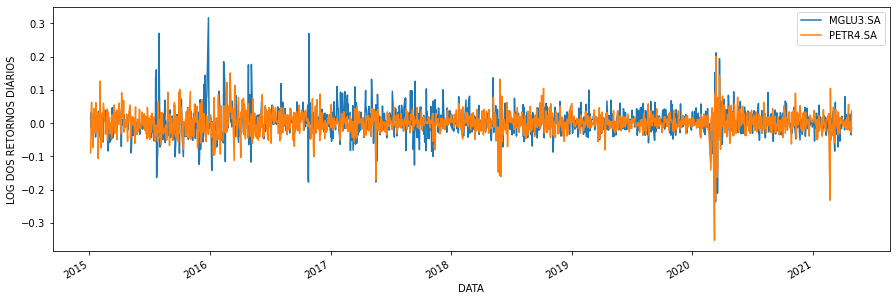

In [23]:
log_returns=np.log(prices/prices.shift(1))
log_returns.plot(figsize=(15,5))
plt.ylabel('LOG DOS RETORNOS DIÁRIOS')
plt.xlabel('DATA')
plt.show()

**Retornos Diários Médios**

In [24]:
log_returns.mean()

MGLU3.SA    0.002917
PETR4.SA    0.000670
dtype: float64

**Retornos Médios Anuais**

In [25]:
log_returns.mean()*250

MGLU3.SA    0.729365
PETR4.SA    0.167394
dtype: float64

**Modelo de Regressão Linear**

A Regressão Linear é uma técnica que consiste em uma equação linear que usa valores de entrada para predizer valores de saída.

Essa equação utiliza coeficientes que são aplicados a valores de entrada para predizer as saídas.

**Modelo**

In [31]:
treino = mglu3

In [35]:
features = ['Open','High','Low','Volume']
treino = treino[features]
treino.head()

,Open,High,Low,Volume
Date,,,,
2015-01-02,0.243750,0.243750,0.231562,6323200.0
2015-01-05,0.235625,0.240625,0.229687,10326400.0
2015-01-06,0.238437,0.238437,0.233125,12572800.0
2015-01-07,0.237500,0.242187,0.234687,6454400.0
2015-01-08,0.239375,0.242187,0.237500,8393600.0


In [33]:
treino1 = petr4

In [36]:
features = ['Open','High','Low','Volume']
treino1 = treino1[features]
treino1.head()

,Open,High,Low,Volume
Date,,,,
2015-01-02,9.99,9.99,9.35,49559500.0
2015-01-05,9.14,9.19,8.53,78385100.0
2015-01-06,8.71,8.83,8.04,84723300.0
2015-01-07,8.56,8.73,8.36,85531000.0
2015-01-08,8.79,9.39,8.74,83306300.0


In [37]:
y = mglu3['Close']

In [38]:
z = petr4['Close']

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

**Fazendo Predições**

In [41]:
X_treino, X_teste, y_treino, y_teste = train_test_split(
treino, y,random_state=42)

In [42]:
X_treino.head()

,Open,High,Low,Volume
Date,,,,
2017-08-18,1.691406,1.831992,1.660156,70041600.0
2017-09-08,2.695625,2.728125,2.437500,71171200.0
2017-10-16,2.287500,2.335937,2.154062,102384000.0
2015-11-10,0.042968,0.043750,0.040625,115302400.0
2015-01-28,0.207187,0.210625,0.200937,17606400.0


In [45]:
X_treino, X_teste, y_treino, y_teste = train_test_split(
treino1, z,random_state=42)

In [47]:
X_treino.head()

,Open,High,Low,Volume
Date,,,,
2019-04-22,27.690001,27.889999,27.32,45321900.0
2019-12-17,29.639999,29.900000,29.43,40679900.0
2019-05-21,25.700001,26.490000,25.42,57846700.0
2016-02-02,4.560000,4.650000,4.30,53610300.0
2016-05-03,10.010000,10.090000,9.71,47074700.0


In [50]:
lr_model = LinearRegression()

In [51]:
lr_model.fit(X_treino,y_treino)

LinearRegression()

In [53]:
lr_model.coef_

array([-7.44929456e-01,  9.13465324e-01,  8.31082603e-01,  4.75930406e-12])

In [54]:
lr_model.predict(X_teste)[:10]

array([15.8809358 , 15.8219973 ,  8.38678597, 15.85426793, 30.38853473,
       13.21767596, 21.82791933, 16.19648818, 26.11917288, 12.47680178])

**Comparando os Resultados da Tabela**

In [55]:
y_teste[:10]

Date
2016-12-07    15.860000
2017-11-27    15.870000
2016-04-11     8.390000
2018-06-01    16.160000
2020-02-19    30.549999
2015-06-22    13.170000
2018-04-11    21.799999
2017-11-23    16.190001
2019-08-08    26.350000
2015-06-01    12.360000
Name: Close, dtype: float64

In [56]:
lr_model.predict(X_teste)[:10]

array([15.8809358 , 15.8219973 ,  8.38678597, 15.85426793, 30.38853473,
       13.21767596, 21.82791933, 16.19648818, 26.11917288, 12.47680178])

**Validando o Modelo**

In [57]:
RMSE = mean_squared_error(y_teste, lr_model.predict(X_teste))**0.5
RMSE

0.17603956052669897